# Results

This notebook presents the results we obtained with the models used
in the different steps of the task.

#### Imports

In [1]:
import numpy as np
import pandas as pd

from data_io import read_data
from utils import pred_results, display_result, label_map

#### Load Ground Truth

In [2]:
_, labels_train = read_data(mode='train')
y_true_train = np.asarray([label_map[label] for label in labels_train])

In [3]:
_, labels_val = read_data(mode='val')
y_true_val = np.asarray([label_map[label] for label in labels_val])

In [4]:
_, labels_test = read_data(mode='test')
y_true_test = np.asarray([label_map[label] for label in labels_test])

## Part 1
### Custom Text Normalization

The code that is used to normalize the text for Part 2 and Part 3 can be found in the file ```utils.py```,
(function ```normalize```), while subsequent data manipulation (sentence word averaging etc.),
is implemented in the script ```data_representation.py```.

## Part 2
### ```Tf-idf```-based model

This model normalizes the input, applies Tf-idf vectorization to the text data and uses a logistic
regression classifier with a multinomial target distribution. The pipeline can be found in the `baseline.ipynb` notebook

The model achieves an F1 weighted score of 0.77419 on the test set

In [5]:
# Load predictions
model = "tfidf_logreg"
y_pred_train = np.load(f"./predictions/logreg/train_{model}.npy", allow_pickle=True)
y_pred_val = np.load(f"./predictions/logreg/val_{model}.npy", allow_pickle=True)
y_pred_test = np.load(f"./predictions/logreg/test_{model}.npy", allow_pickle=True)

f1 score micro:           0.77056
f1 score weighted:        0.77419
balanced accuracy score:  0.72253


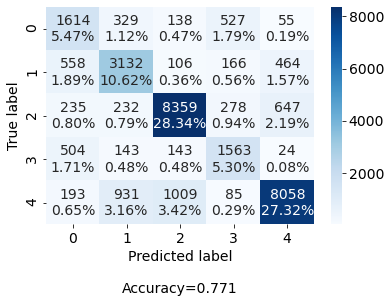

In [6]:
# Results on Test
display_result(y_true_test, y_pred_test)

In [7]:
# Results on Validation
# display_result(y_true_val, y_pred_val)

In [8]:
# Results on Train
# display_result(y_true_train, y_pred_train)

## Part 3

### Word Embedding Based models

### Word2Vec

To fit a classifier model we first normalize the data and then apply the word2vec algorithm so that we can work with numerical data instead of words. For every sentence we then take the vector-embedding of the individual words and average over them so that we can represent every sentence with one vector. The resulting data is then used to fit a logistic regression model as well as xgboost. The pipeline can be found in the `w2v_logreg_xgb.ipynb` notebook.

#### Logistic Regression

In [5]:
# Load predictions
model = "w2v_logreg"
y_pred_train = np.load(f"./predictions/word2vec/train_{model}.npy", allow_pickle=True)
y_pred_val = np.load(f"./predictions/word2vec/val_{model}.npy", allow_pickle=True)
y_pred_test = np.load(f"./predictions/word2vec/test_{model}.npy", allow_pickle=True)

f1 score micro:           0.76771
f1 score weighted:        0.76366
balanced accuracy score:  0.67892


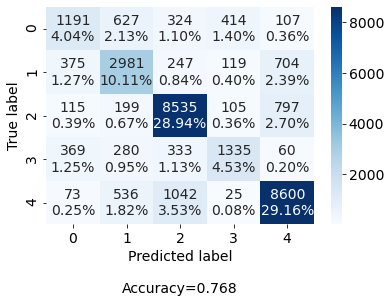

In [6]:
# Results on Test
display_result(y_true_test, y_pred_test)

#### XGBoost

In [7]:
# Load predictions
model = "w2v_xgb"
y_pred_train = np.load(f"./predictions/word2vec/train_{model}.npy", allow_pickle=True)
y_pred_val = np.load(f"./predictions/word2vec/val_{model}.npy", allow_pickle=True)
y_pred_test = np.load(f"./predictions/word2vec/test_{model}.npy", allow_pickle=True)

f1 score micro:           0.79327
f1 score weighted:        0.78981
balanced accuracy score:  0.70631


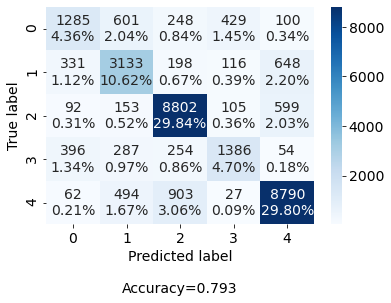

In [8]:
# Results on Test
display_result(y_true_test, y_pred_test)

### Fasttext
see `fasttext.ipynb`

We first used fasttext's unsupervised learning algorithm to create word embeddings. The mean embeddings of the sentences were then used to train a logistic resp. XGBoost classifier.

##### Unsupervised Fasttext - Logistic Regression

In [9]:
# Load predictions
model = "ft_unsup"
y_pred_train = np.load(f"./predictions/fasttext/train_{model}.npy", allow_pickle=True)
y_pred_val = np.load(f"./predictions/fasttext/val_{model}.npy", allow_pickle=True)
y_pred_test = np.load(f"./predictions/fasttext/test_{model}.npy", allow_pickle=True)

f1 score micro:           0.74753
f1 score weighted:        0.75242
balanced accuracy score:  0.69356


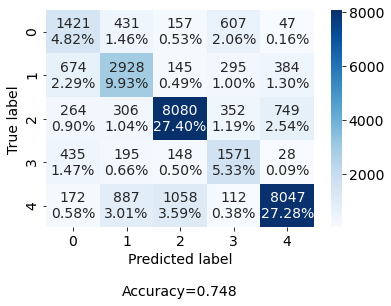

In [10]:
# Results on Test
display_result(y_true_test, y_pred_test)

In [ ]:
# Results on Validation
# display_result(y_true_val, y_pred_val)

In [ ]:
# Results on Train
# display_result(y_true_train, y_pred_train)

##### Unsupervised Fasttext - XGBoost

In [11]:
# Load predictions
model = "ft_xgb_unsup"
y_pred_train = np.load(f"./predictions/fasttext/train_{model}.npy", allow_pickle=True)
y_pred_val = np.load(f"./predictions/fasttext/val_{model}.npy", allow_pickle=True)
y_pred_test = np.load(f"./predictions/fasttext/test_{model}.npy", allow_pickle=True)

f1 score micro:           0.78005
f1 score weighted:        0.77652
balanced accuracy score:  0.69351


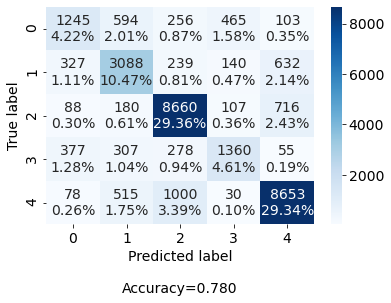

In [12]:
# Results on Test
display_result(y_true_test, y_pred_test)

In [ ]:
# Results on Validation
# display_result(y_true_val, y_pred_val)

In [ ]:
# Results on Train
# display_result(y_true_train, y_pred_train)

#### Supervised Fasttext
Additionally, we also tested fastext's supervised learning algorithm. The following shows the result without preprocessing (cf.`fasttext.ipynb`).

In [13]:
# Load predictions
model = "ft_sup"
y_pred_train = np.load(f"./predictions/fasttext/train_{model}.npy", allow_pickle=True)
y_pred_val = np.load(f"./predictions/fasttext/val_{model}.npy", allow_pickle=True)
y_pred_test = np.load(f"./predictions/fasttext/test_{model}.npy", allow_pickle=True)

In [15]:
# fasttext supervised worked directly with the concrete labels --> convert them
y_pred_train = np.asarray([label_map[label] for label in y_pred_train])
y_pred_val = np.asarray([label_map[label] for label in y_pred_val])
y_pred_test = np.asarray([label_map[label] for label in y_pred_test])

f1 score micro:           0.85495
f1 score weighted:        0.85382
balanced accuracy score:  0.79086


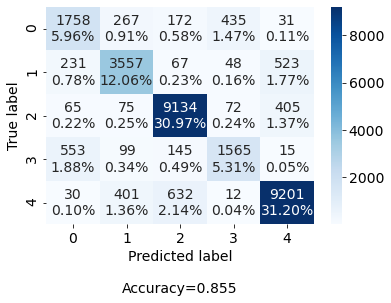

In [16]:
# Results on Test
display_result(y_true_test, y_pred_test)

In [ ]:
# Results on Validation
# display_result(y_true_val, y_pred_val)

In [ ]:
# Results on Train
# display_result(y_true_train, y_pred_train)

#### MLP

The training and evaluation code can be found in the file ```deep_averaging_network.py```.

In [5]:
# Load predictions
model = "deep_averaging_network"
y_pred_train = np.load(f"./predictions/mlp/train_{model}.npy", allow_pickle=True)
y_pred_val = np.load(f"./predictions/mlp/val_{model}.npy", allow_pickle=True)
y_pred_test = np.load(f"./predictions/mlp/test_{model}.npy", allow_pickle=True)

f1 score micro:           0.87227
f1 score weighted:        0.87278
balanced accuracy score:  0.82266


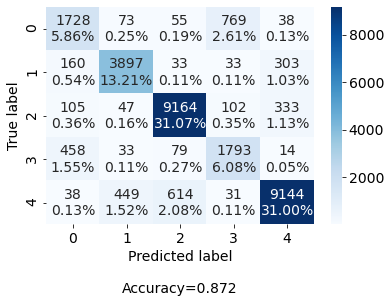

In [6]:
# Results on Test
display_result(y_true_test, y_pred_test)

In [7]:
# Results on Validation
# display_result(y_true_val, y_pred_val)

In [ ]:
# Results on Train
# display_result(y_true_train, y_pred_train)

## Part 4

### Recurrent and Attention based Models

#### Recurrent Neural Networks with Custom Word Embeddings

The training and evaluation code can be found in the file ```w2v_rnn.py```.

In [10]:
# Load predictions
model = "w2v_rnn"
y_pred_train = np.load(f"./predictions/w2v_rnn/train_{model}.npy", allow_pickle=True)
y_pred_val = np.load(f"./predictions/w2v_rnn/val_{model}.npy", allow_pickle=True)
y_pred_test = np.load(f"./predictions/w2v_rnn/test_{model}.npy", allow_pickle=True)

f1 score micro:           0.8599
f1 score weighted:        0.85898
balanced accuracy score:  0.79774


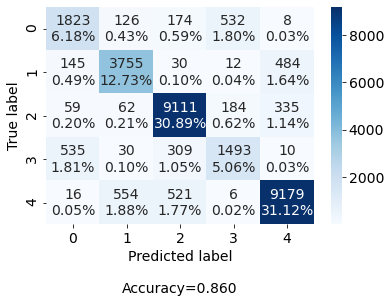

In [11]:
# Results on Test
display_result(y_true_test, y_pred_test)

In [ ]:
# Results on Validation
# display_result(y_true_val, y_pred_val)

In [ ]:
# Results on Train
# display_result(y_true_train, y_pred_train)

#### Recurrent Neural Networks with Independent Word Embeddings

The training and evaluation code can be found in the file ```text_vectorizer_rnn.py```.


In [7]:
# Load predictions
model = "text_vect_2lstm"
y_pred_train = np.load(f"./predictions/vect_rnn/train_{model}.npy", allow_pickle=True)
y_pred_val = np.load(f"./predictions/vect_rnn/val_{model}.npy", allow_pickle=True)
y_pred_test = np.load(f"./predictions/vect_rnn/test_{model}.npy", allow_pickle=True)

f1 score micro:           0.89971
f1 score weighted:        0.89912
balanced accuracy score:  0.84569


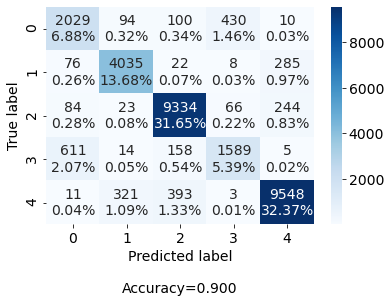

In [8]:
# Results on Test
display_result(y_true_test, y_pred_test)

In [7]:
# Results on Validation
# display_result(y_true_val, y_pred_val)

In [8]:
# Results on Train
# display_result(y_true_train, y_pred_train)

#### Fine-Tuned Pretrained BERT

The training and evaluation code can be found in the file ```BERT_classification.py```.

In [12]:
# Load predictions
model = "bert_keras"
y_pred_train = np.load(f"./predictions/bert/train_{model}.npy", allow_pickle=True)
y_pred_val = np.load(f"./predictions/bert/val_{model}.npy", allow_pickle=True)
y_pred_test = np.load(f"./predictions/bert/test_{model}.npy", allow_pickle=True)

f1 score micro:           0.91832
f1 score weighted:        0.91759
balanced accuracy score:  0.86436


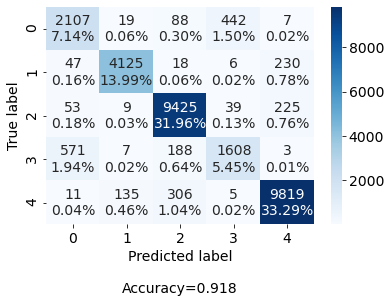

In [13]:
# Results on Test
display_result(y_true_test, y_pred_test)

In [ ]:
# Results on Validation
# display_result(y_true_val, y_pred_val)

In [ ]:
# Results on Train
# display_result(y_true_train, y_pred_train)

#### Fine-Tuned Pretrained Transformer-based Models and hierarchical modelling

This model builds on and is inspired by the following work: [Hierarchical Neural Networks for Sequential Sentence Classification in Medical Scientific Abstracts, Jin et al.](https://arxiv.org/abs/1808.06161)

- We use a pretrained BERT language model from the Tensorflow Hub. Specifically the model has been pretrained on the Pubmed dataset. We then fine-tune this model to our task by attaching a dense classifier head and running a single epoch over the whole training data. See `bert.ipynb` for further details

- We then use the fine-tuned BERT network, detach the classification head and feed the entire dataset through the transformer network and store the pooled outputs to get a single embedding for each sentence in the dataset. See `bert_predict_embeddings.ipynb` for details.

- To further consider the sentence structure within an abstract in our prediction pipeline we train a bidirectional RNN on the abstracts with the previously obtained sentence embeddings and predict a complete sequence of labels for each abstract, while padding each abstract to the longest found abstract. See `hierarchical_modelling.ipynb` for further details.

This model even slightly improves over the current state of the art (the paper states a F1 weighted score of 0.939), and we achieve an F1 weighted score of **0.94366** on our test set. We attribute this to the fact, that our model extracting is a more powerful transformer, than the CNNs and bidirectional RNNs used in the paper.

In [9]:
# Load predictions
model = "sentence_model_bert_finetuned_embeddings"
y_pred_train = np.load(f"./predictions/hierarchical/train_{model}.npy", allow_pickle=True)
y_pred_val = np.load(f"./predictions/hierarchical/val_{model}.npy", allow_pickle=True)
y_pred_test = np.load(f"./predictions/hierarchical/test_{model}.npy", allow_pickle=True)

f1 score micro:           0.94385
f1 score weighted:        0.94366
balanced accuracy score:  0.90355


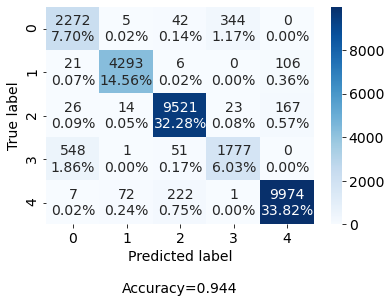

In [10]:
# Results on Test
display_result(y_true_test, y_pred_test)

In [11]:
# Results on Validation
# display_result(y_true_val, y_pred_val)

In [12]:
# Results on Train
# display_result(y_true_train, y_pred_train)